In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Helper functions

In [2]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [4]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])

## Part1

In [9]:
X.shape

(40, 768)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0,0,0,1,1,2,1,0,0,1,...,6,5,3,4,2,0,1,2,2,6
1,0,0,0,0,0,0,0,0,0,0,...,0,3,2,1,3,0,1,5,1,23
2,1,0,1,1,2,2,0,3,3,3,...,8,12,14,20,15,12,23,17,20,87
3,0,0,0,0,0,0,0,0,0,0,...,38,22,18,15,8,0,0,0,0,0
4,255,38,40,37,49,35,54,55,79,68,...,18,7,7,4,7,10,4,6,3,58


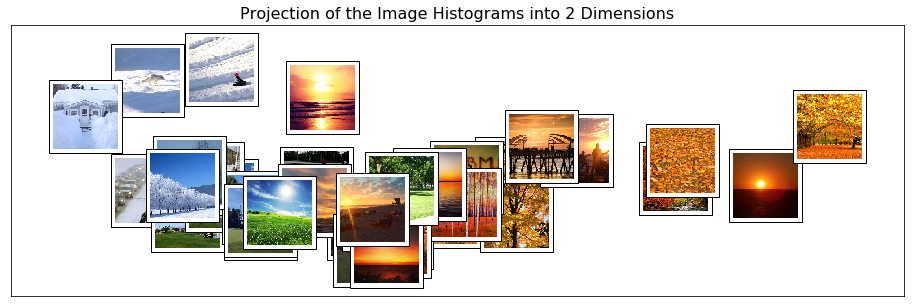

In [11]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
plot_image_space(images, X_new, title="Projection of the Image Histograms into 2 Dimensions")

## Part 2

If two images are close together in the above plot, it means they have similar histograms of color values, While two images which are far apart have different histograms of color values.


All those images that belongs to one season are inclined to group together more closely than others. This is because images of a specific season have specific color values, for example: white -> winter, green -> spring, red -> summer and yellow -> fall.
Therefore, images that are grouped together have similar histogram of color values.



## Part 3

In this part, I have used "Feature Agglomeration" as unsupervised dimensionality reduction method, which applies hierarchical clustering to group together all those features that have similar attributes.

If features have very different scaling, FeatureAgglomeration may not be able to capture the similar links between related features. For this i have normalized the dataset.



In [48]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Normalizing Image using MinMaxScalar 
mmsc = MinMaxScaler()
mm = mmsc.fit(X)
X_n = mm.transform(X)
X_n.shape

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(40, 768)

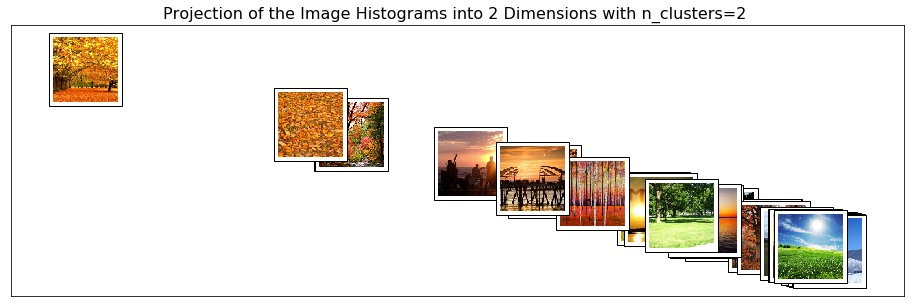

In [49]:
#appplying feature agglomeration
fa = FeatureAgglomeration(n_clusters=2)
X_new = fa.fit_transform(X)
plot_image_space(images, X_new, title="Projection of the Image Histograms into 2 Dimensions with n_clusters=2 ")

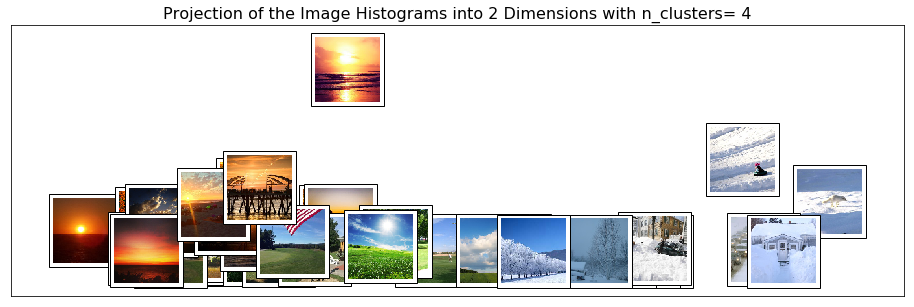

In [50]:
fa = FeatureAgglomeration(n_clusters=4)
X_new = fa.fit_transform(X)
plot_image_space(images, X_new, title="Projection of the Image Histograms into 2 Dimensions with n_clusters= 4")

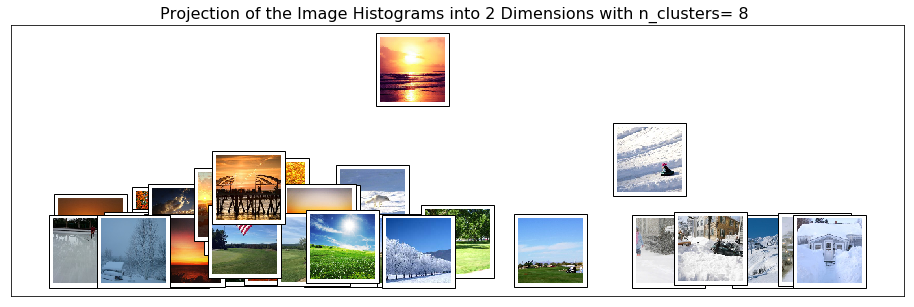

In [51]:
fa = FeatureAgglomeration(n_clusters=8)
X_new = fa.fit_transform(X)
plot_image_space(images, X_new, title="Projection of the Image Histograms into 2 Dimensions with n_clusters= 8 ")

If we observe the above plots of the images, the performance of dimensionality reduction method improved significantly on increasing the # of clusters from 2 to 4 and then to 8.

In this case, the results from PCA and Feature Agglomeration methods support similar interpretations.